In [13]:
from collections import Counter
from importlib import reload
import germibeta as G

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

## Inglés

In [64]:
reload(G)
gg = G.Germibeta()

In [65]:
F = pd.read_csv('fbc_brown.csv', header=None)
F.columns = ['freq']
F = F.to_numpy().reshape(-1,)

In [66]:
gg = G.Germibeta()
gg.ajuste(F, metodo='trf', verbose=True)

(82,) - (82,)
LinregressResult(slope=-1.8832582040718762, intercept=10.702344460351878, rvalue=-0.9621049587116809, pvalue=6.570158589806401e-47, stderr=0.059675316559220634, intercept_stderr=0.21266349729996298)
Punto inicial [10.70234446  1.8832582   1.8832582  82.        ]
Parámetros óptimos
[1.72677280e-02 1.86742808e-02 1.08907826e+02 6.59492668e-02]
R2 0.96540


array([1.39790005e+00, 6.44415483e-01, 9.26902905e+02, 8.20000000e+01,
       9.65401493e-01])

In [67]:
gg.params

array([1.39790005e+00, 6.44415483e-01, 9.26902905e+02, 8.20000000e+01,
       9.65401493e-01])

Usando la transformación `log - log`

In [69]:

a, b, A, N, r2 = gg.ajuste(F, metodo='loglog')
a, b, A, r2

(1.3617174880825507, 0.73704234854528, 582.17255373865, 0.9964336216593583)

Graficamos

In [70]:
gg.params

[1.3617174880825507, 0.73704234854528, 582.17255373865, 82, 0.9964336216593583]

In [71]:
N= len(F)
R= np.arange(1, N + 1)
F_model =G.germibeta(R, *gg.params)

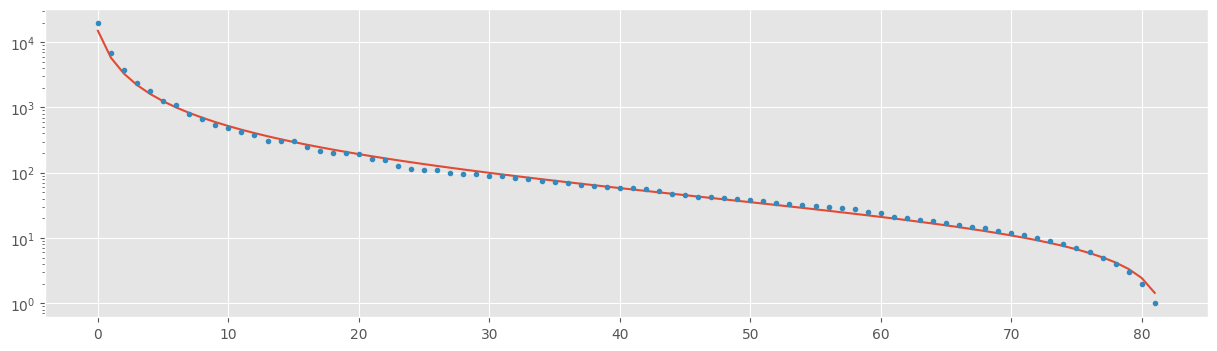

In [72]:
fig, ax = plt.subplots(1,1,figsize=(15,4))
ax.semilogy(F_model,'-')
ax.plot(F,'.')

In [35]:
# y = F.to_numpy().reshape(1,-1)[0]
y = F
len(y), N, gg.params

(79,
 79,
 array([6.06471195e-01, 1.91436356e+00, 2.13919296e-02, 7.90000000e+01,
        9.81167011e-01]))

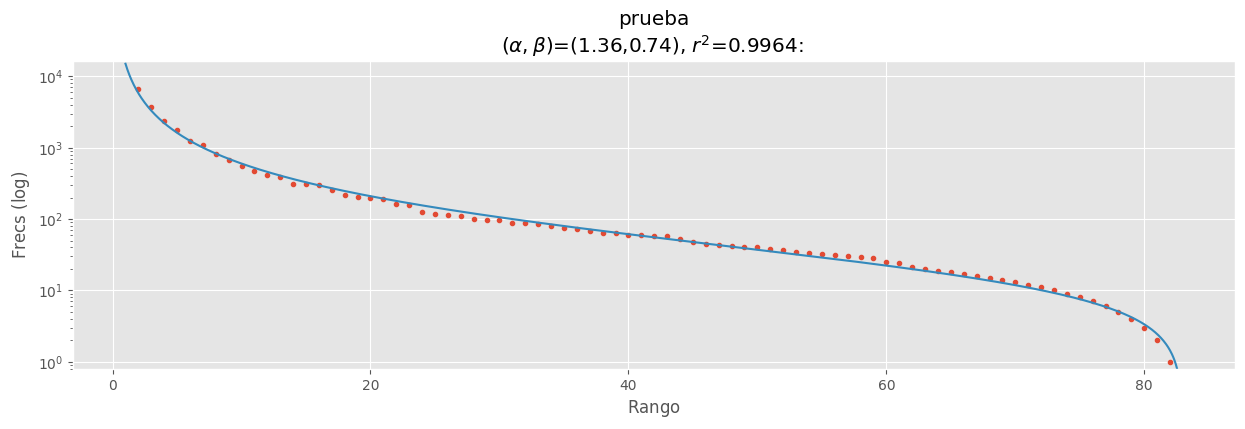

In [73]:

fig, ax = plt.subplots(1,1,figsize=(15,4))
G.graf_datos(F, gg.params, 'prueba', 'prueba', ax=ax)

## Con Differential Evolution

Vamos a probar con `scipy.optimize.differential_evolucion`

In [ ]:
from scipy.optimize import differential_evolution

def objective(params, r, F, N):
    logA, a, b = params
    F_pred_log = modelo_loglog(r, logA, a, b, N)
    residuals = np.log(F) - F_pred_log
    return np.sum(residuals**2)   # SSR in log space

modelo_loglog = lambda r, logA, alfa, beta: logA + beta*np.log(self.N + 1 - r) - alfa*np.log(r)


bounds = [(1, 200), (-5, 5), (-5, 5)]


result = differential_evolution(
    objective,
    bounds,
    args=(R, F, N),
    tol=1e-6,
    polish=True
)

logA_opt, a_opt, b_opt = result.x
A_opt = np.exp(logA_opt)

params = [A_opt, a_opt, b_opt]
print(params)

## Familias de Rids-Ros

In [76]:
import glob
glob.glob("PF*.txt")

['PF00009_a.txt',
 'PF00009_D.txt',
 'PF00428_a.txt',
 'PF00428_D.txt',
 'PF00635_a.txt',
 'PF01018_a.txt',
 'PF02020_a.txt']

In [95]:
F = []
fname = './PF00428_a.txt'

F = sorted(Counter([int(y) for x in open(fname,'r').readlines() for y in x.strip().split(",") if y!='' ]).values(), reverse=True)
N = len(F)
F

[150,
 135,
 124,
 121,
 111,
 110,
 96,
 90,
 82,
 80,
 75,
 73,
 63,
 63,
 58,
 56,
 55,
 55,
 55,
 53,
 51,
 50,
 50,
 49,
 49,
 49,
 47,
 47,
 47,
 47,
 44,
 43,
 41,
 40,
 40,
 39,
 38,
 37,
 35,
 34,
 33,
 32,
 32,
 28,
 27,
 27,
 26,
 26,
 25,
 25,
 21,
 20,
 20,
 16,
 15,
 14,
 13,
 12,
 12,
 11,
 9,
 7,
 7,
 7,
 6,
 6,
 5,
 4,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

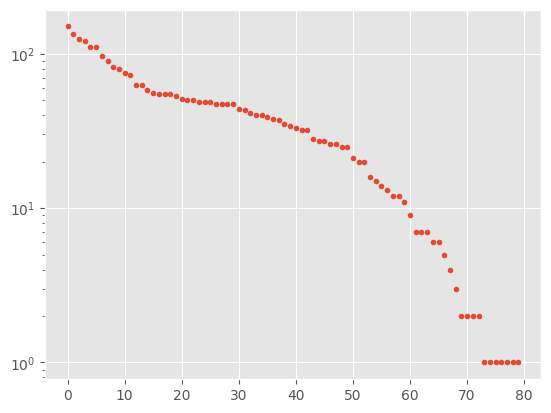

In [97]:
plt.semilogy(F,'.')

In [ ]:
gg.ajuste(F, metodo='loglog')

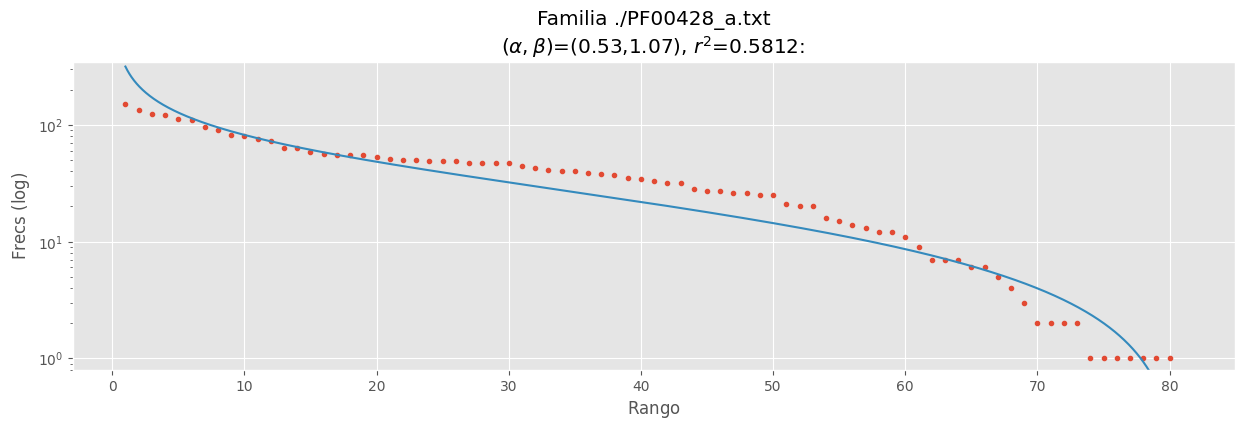

In [102]:

fig, ax = plt.subplots(1,1,figsize=(15,4))
G.graf_datos(F, gg.params, f'Familia {fname}', 'prueba', ax=ax)